In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error


plt.rcParams['font.family'] = 'Noto Sans'

In [2]:
#Cell_2.
csv_in="yields.csv"
df=pd.read_csv(csv_in,skiprows=0,header=0,delimiter=',',encoding="shift-jis")
print(df.shape) #確認
print(df.head()) #確認
print(type(df['time'][0]))\
#df['time']=pd.to_datetime(df['time'].astype(int),unit='ms')
#df['time']=pd.to_datetime(df['time'])
#print(type(df['time'][0]))

(12787, 216)
           time  AU01  AU02   AU03  AU05  AU07  AU10  AU15  AU20  AU30  ...  \
0  957533400000  6.28  6.34  6.460  6.52   0.0  6.56  6.56   0.0   0.0  ...   
1  957792600000  6.26  6.34  6.415  6.52   0.0  6.56  6.49   0.0   0.0  ...   
2  957879000000  6.34  6.38  6.500  6.54   0.0  6.55  6.55   0.0   0.0  ...   
3  957965400000  6.24  6.34  6.390  6.51   0.0  6.54  6.50   0.0   0.0  ...   
4  958051800000  6.22  6.26  6.374  6.42   0.0  6.41  6.42   0.0   0.0  ...   

   US03M  US06M  US01   US02   US03   US05  US07   US10  US20   US30  
0  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.511   0.0  6.157  
1  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.568   0.0  6.157  
2  5.984  6.031   0.0  6.872  4.557  6.827   0.0  6.524   0.0  6.248  
3  6.115  6.140   0.0  6.851  4.557  6.788   0.0  6.457   0.0  6.216  
4  6.083  6.104   0.0  6.804  4.557  6.668   0.0  6.420   0.0  6.154  

[5 rows x 216 columns]
<class 'numpy.int64'>


In [3]:
#Cell_3.
from datetime import datetime
for i in range(len(df)):
    df.loc[i,'time']= datetime.fromtimestamp((df.loc[i,'time']/1000))

In [4]:
#Cell_4.
display(df.head())
display(df.tail())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2000-05-05 22:30:00,6.28,6.34,6.460,6.52,0.0,6.56,6.56,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.511,0.0,6.157
1,2000-05-08 22:30:00,6.26,6.34,6.415,6.52,0.0,6.56,6.49,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.568,0.0,6.157
2,2000-05-09 22:30:00,6.34,6.38,6.500,6.54,0.0,6.55,6.55,0.0,0.0,...,5.984,6.031,0.0,6.872,4.557,6.827,0.0,6.524,0.0,6.248
3,2000-05-10 22:30:00,6.24,6.34,6.390,6.51,0.0,6.54,6.50,0.0,0.0,...,6.115,6.140,0.0,6.851,4.557,6.788,0.0,6.457,0.0,6.216
4,2000-05-11 22:30:00,6.22,6.26,6.374,6.42,0.0,6.41,6.42,0.0,0.0,...,6.083,6.104,0.0,6.804,4.557,6.668,0.0,6.420,0.0,6.154


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
12782,1973-04-03 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12783,1973-04-04 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12784,1973-04-05 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12785,1973-04-06 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12786,1973-04-09 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Cell_5.
df_sorted = df.sort_values(by='time')
display(df_sorted.tail(20))

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
5068,2020-06-26 22:30:00,0.2573,0.2644,0.2594,0.3934,0.5907,0.8779,1.1987,1.4933,1.7047,...,0.1344,0.1674,0.1649,0.1761,0.1945,0.3050,0.4849,0.6495,1.1488,1.3744
5069,2020-06-29 22:30:00,0.2400,0.2581,0.2629,0.3917,0.6019,0.8942,1.2294,1.5297,1.7333,...,0.1242,0.1547,0.1624,0.1591,0.1672,0.2692,0.4593,0.6266,1.1422,1.3737
5070,2020-06-30 22:30:00,0.2555,0.2581,0.2652,0.3980,0.5910,0.8794,1.2070,1.5150,1.7250,...,0.1420,0.1674,0.1522,0.1677,0.1796,0.2773,0.4744,0.6577,1.1758,1.4110
5071,2020-07-01 22:30:00,0.2601,0.2480,0.2817,0.4063,0.6305,0.9461,1.2634,1.5892,1.7975,...,0.1420,0.1624,0.1624,0.1764,0.1905,0.3089,0.5035,0.6783,1.1874,1.4222
5072,2020-07-02 22:30:00,0.2586,0.2547,0.2700,0.4054,0.6163,0.9354,1.2693,1.5813,1.7923,...,0.1420,0.1573,0.1599,0.1659,0.1826,0.2925,0.4930,0.6750,1.1919,1.4302
5073,2020-07-06 22:30:00,0.2590,0.2525,0.2718,0.4157,0.6142,0.9363,1.2715,1.6007,1.8396,...,0.1420,0.1674,0.1522,0.1681,0.1881,0.2981,0.4965,0.6816,1.2030,1.4402
5074,2020-07-07 22:30:00,0.2570,0.2559,0.2645,0.4013,0.5883,0.8925,1.2263,1.5573,1.8273,...,0.1471,0.1624,0.1624,0.1703,0.1909,0.2826,0.4673,0.6414,1.1439,1.3757
5075,2020-07-08 22:30:00,0.2526,0.2554,0.2710,0.3925,0.5737,0.8805,1.1973,1.5140,1.7778,...,0.1471,0.1573,0.1522,0.1726,0.1903,0.2931,0.4953,0.6693,1.1701,1.4032
5076,2020-07-09 22:30:00,0.2544,0.2552,0.2675,0.4072,0.5982,0.9068,1.2303,1.5345,1.8116,...,0.1471,0.1522,0.1497,0.1618,0.1825,0.2792,0.4591,0.6217,1.0925,1.3150
5077,2020-07-10 22:30:00,0.2500,0.2520,0.2705,0.4073,0.5763,0.8655,1.1903,1.5029,1.7707,...,0.1268,0.1471,0.1522,0.1729,0.1956,0.2979,0.4824,0.6463,1.1144,1.3359


In [6]:
#Cell_6.
df_sorted['time']=pd.to_datetime(df_sorted['time'])
df_sorted['time']=df_sorted['time'].dt.date

df_sorted=df_sorted.reset_index(drop=True)
df_sorted['time']=pd.to_datetime(df_sorted['time'])
display(df_sorted.head())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,1970-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Cell_7.
csv_in2="5332_2018.csv"
df2=pd.read_csv(csv_in2,skiprows=1,header=0,delimiter=',',encoding="shift-jis")
print(df2.shape) #確認
print(df2.head()) #確認
print(type(df2['日付'][0]))
df2['日付']=pd.to_datetime(df2['日付'])
print(type(df2['日付'][0]))

(120, 7)
           日付    始値    高値    安値    終値     出来高  終値調整値
0  2018-01-04  6750  6900  6730  6900  861900   6900
1  2018-01-05  6940  6950  6860  6890  708000   6890
2  2018-01-09  6950  6950  6830  6890  490600   6890
3  2018-01-10  6940  6940  6860  6880  297100   6880
4  2018-01-11  6850  6870  6770  6820  598400   6820
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
#Cell_8.
df2.columns=['time','start','high','low','close','volume','adj-close']
display(df2.head())

,time,start,high,low,close,volume,adj-close
0,2018-01-04,6750,6900,6730,6900,861900,6900
1,2018-01-05,6940,6950,6860,6890,708000,6890
2,2018-01-09,6950,6950,6830,6890,490600,6890
3,2018-01-10,6940,6940,6860,6880,297100,6880
4,2018-01-11,6850,6870,6770,6820,598400,6820


In [9]:
#Cell_9.
df_merged=pd.merge(df2,df_sorted,on='time',how='left')
df_merged=df_merged.fillna(method='ffill')
display(df_merged.head())

,time,start,high,low,close,volume,adj-close,AU01,AU02,AU03,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2018-01-04,6750,6900,6730,6900,861900,6900,1.6914,1.8644,2.0798,...,1.4091,1.5956,1.8125,1.9515,2.0398,2.2953,2.4114,2.4817,0.0,2.7882
1,2018-01-05,6940,6950,6860,6890,708000,6890,1.6914,1.8644,2.0798,...,1.4038,1.5888,1.8005,1.9599,2.0706,2.2852,2.4040,2.4772,0.0,2.8078
2,2018-01-09,6950,6950,6830,6890,490600,6890,1.7094,1.9067,2.1311,...,1.4488,1.6007,1.7861,1.9804,2.0876,2.3375,2.4707,2.5563,0.0,2.8992
3,2018-01-10,6940,6940,6860,6880,297100,6880,1.7004,2.0300,2.1258,...,1.4168,1.5865,1.7639,1.9846,2.0946,2.3342,2.4739,2.5595,0.0,2.9016
4,2018-01-11,6850,6870,6770,6820,598400,6820,1.8282,2.0522,2.1549,...,1.4295,1.5891,1.7691,1.9929,2.1027,2.3393,2.4758,2.5477,0.0,2.8681


In [10]:
#Cell_10.
df_d=df_merged.copy()
df_d['time']-=df_d['time'][0]
#print(type(df_d['time'][0]))
df_d['time']/=np.timedelta64(1,'D')
#print(type(df_d['日付'][0]))
print(df_d.head())

   time  start  high   low  close  volume  adj-close    AU01    AU02    AU03  \
0   0.0   6750  6900  6730   6900  861900       6900  1.6914  1.8644  2.0798   
1   1.0   6940  6950  6860   6890  708000       6890  1.6914  1.8644  2.0798   
2   5.0   6950  6950  6830   6890  490600       6890  1.7094  1.9067  2.1311   
3   6.0   6940  6940  6860   6880  297100       6880  1.7004  2.0300  2.1258   
4   7.0   6850  6870  6770   6820  598400       6820  1.8282  2.0522  2.1549   

   ...   US03M   US06M    US01    US02    US03    US05    US07    US10  US20  \
0  ...  1.4091  1.5956  1.8125  1.9515  2.0398  2.2953  2.4114  2.4817   0.0   
1  ...  1.4038  1.5888  1.8005  1.9599  2.0706  2.2852  2.4040  2.4772   0.0   
2  ...  1.4488  1.6007  1.7861  1.9804  2.0876  2.3375  2.4707  2.5563   0.0   
3  ...  1.4168  1.5865  1.7639  1.9846  2.0946  2.3342  2.4739  2.5595   0.0   
4  ...  1.4295  1.5891  1.7691  1.9929  2.1027  2.3393  2.4758  2.5477   0.0   

     US30  
0  2.7882  
1  2.8078  
2 

In [11]:
#Cell_11.
X = df_d.drop(columns=['close','high','low','start','volume','adj-close'])
Y = df_d[['close']]

In [12]:
#Cell_12.
print('X:', X.shape)
print(X.info())
display(X.head())
print('Y:', Y.shape)
print(Y.head())

X: (120, 216)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Columns: 216 entries, time to US30
dtypes: float64(216)
memory usage: 207.5 KB
None


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,0.0,1.6914,1.8644,2.0798,2.2424,2.5027,2.6178,2.8867,0.0,3.3257,...,1.4091,1.5956,1.8125,1.9515,2.0398,2.2953,2.4114,2.4817,0.0,2.7882
1,1.0,1.6914,1.8644,2.0798,2.2424,2.5027,2.6178,2.8867,0.0,3.3257,...,1.4038,1.5888,1.8005,1.9599,2.0706,2.2852,2.4040,2.4772,0.0,2.8078
2,5.0,1.7094,1.9067,2.1311,2.2677,2.5894,2.7086,2.9794,0.0,3.4184,...,1.4488,1.6007,1.7861,1.9804,2.0876,2.3375,2.4707,2.5563,0.0,2.8992
3,6.0,1.7004,2.0300,2.1258,2.3710,2.6012,2.7262,2.9942,0.0,3.4362,...,1.4168,1.5865,1.7639,1.9846,2.0946,2.3342,2.4739,2.5595,0.0,2.9016
4,7.0,1.8282,2.0522,2.1549,2.3902,2.6174,2.7370,3.0084,0.0,3.4484,...,1.4295,1.5891,1.7691,1.9929,2.1027,2.3393,2.4758,2.5477,0.0,2.8681


Y: (120, 1)
   close
0   6900
1   6890
2   6890
3   6880
4   6820


In [13]:
#Cell_13.
X_scaled_ar = scale(X)
y_scaled_ar = scale(Y)
X_scaled = pd.DataFrame(X_scaled_ar, columns=X.columns)
display(X_scaled.head())

/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,-1.725801,-2.376254,-3.641168,-1.137994,-2.420675,-1.610908,-1.796423,-0.988300,0.0,-0.204439,...,-1.851553,-1.874325,-1.526865,-2.036039,-2.333710,-2.400561,-2.642378,-2.745674,0.0,-2.797011
1,-1.706266,-2.376254,-3.641168,-1.137994,-2.420675,-1.610908,-1.796423,-0.988300,0.0,-0.204439,...,-1.882124,-1.914183,-1.592431,-1.990693,-2.165730,-2.467096,-2.694144,-2.779373,0.0,-2.597503
2,-1.628124,-2.136271,-2.743529,-0.276427,-2.016844,-0.426162,-0.705406,0.054770,0.0,0.669035,...,-1.622555,-1.844431,-1.671110,-1.880027,-2.073014,-2.122564,-2.227550,-2.187025,0.0,-1.667145
3,-1.608588,-2.256262,-0.127006,-0.365438,-0.367998,-0.264917,-0.493931,0.221301,0.0,0.836757,...,-1.807138,-1.927664,-1.792406,-1.857354,-2.034837,-2.144303,-2.205165,-2.163062,0.0,-1.642716
4,-1.589053,-0.552383,0.344095,0.123287,-0.061532,-0.043545,-0.364163,0.381080,0.0,0.951713,...,-1.733881,-1.912425,-1.763995,-1.812548,-1.990660,-2.110707,-2.191873,-2.251427,0.0,-1.983711


In [14]:
#Cell_14.
model = sm.OLS(y_scaled_ar, X_scaled)

In [15]:
#Cell_15.
result = model.fit_regularized(
                    method='elastic_net',
                    alpha=0.01,
                    L1_wt=1.0,
                    start_params=None,
                    profile_scale=False,
                    refit=False
                    )

In [16]:
#Cell_16.
b= result.params
print((b[b!=0]))

time   -0.211290
AU01   -0.253910
AU03    0.210282
BE02    0.045821
BE07   -0.210549
BE15    0.188191
BE20   -0.172419
CN01   -0.022799
FR30    0.146201
DE01    0.020017
DE02    0.150590
IN10   -0.136998
IE05    0.165110
IE10   -0.230346
JP02    0.036799
JP15    0.044008
KR02   -0.008650
MY07    0.055656
MY30   -0.019777
NL02    0.000594
NL05   -0.033912
NZ05    0.169898
NZ10   -0.038916
NO05   -0.046768
PL05   -0.354999
PL10   -0.034910
ZA10   -0.012876
ES10    0.102758
SE05   -0.231609
TR02   -0.052688
dtype: float64


[1.00000000e-02 2.05061224e+00 4.09122449e+00 6.13183673e+00
 8.17244898e+00 1.02130612e+01 1.22536735e+01 1.42942857e+01
 1.63348980e+01 1.83755102e+01 2.04161224e+01 2.24567347e+01
 2.44973469e+01 2.65379592e+01 2.85785714e+01 3.06191837e+01
 3.26597959e+01 3.47004082e+01 3.67410204e+01 3.87816327e+01
 4.08222449e+01 4.28628571e+01 4.49034694e+01 4.69440816e+01
 4.89846939e+01 5.10253061e+01 5.30659184e+01 5.51065306e+01
 5.71471429e+01 5.91877551e+01 6.12283673e+01 6.32689796e+01
 6.53095918e+01 6.73502041e+01 6.93908163e+01 7.14314286e+01
 7.34720408e+01 7.55126531e+01 7.75532653e+01 7.95938776e+01
 8.16344898e+01 8.36751020e+01 8.57157143e+01 8.77563265e+01
 8.97969388e+01 9.18375510e+01 9.38781633e+01 9.59187755e+01
 9.79593878e+01 1.00000000e+02]


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0.010000,-2.835472,147.090490,NaN,58.052641,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.050612,-3.780004,199.002861,NaN,91.586699,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.091224,-4.283540,232.882868,NaN,119.239456,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.131837,-4.360635,252.938992,NaN,132.540386,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.172449,-4.285484,268.081269,NaN,142.614592,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Noto Sans.
  func(*args, **kwargs)
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Noto Sans.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' do

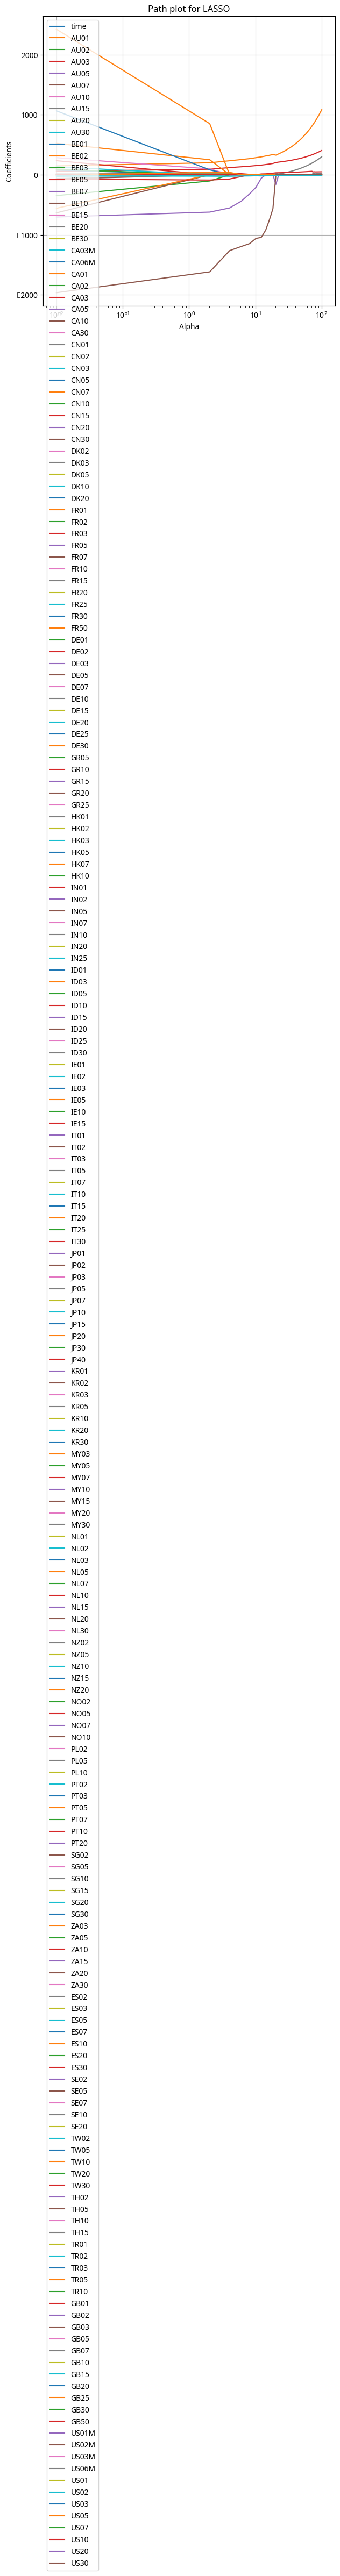

In [24]:
#Cell_17.
ret = []
alphas = np.linspace(0.01, 100)
print(alphas)

for al in alphas:
    r = model.fit_regularized(L1_wt=1.0, alpha=al)
    ret.append(r.params)

df_ret = pd.DataFrame(ret, columns=X_scaled.columns, index=alphas)
display(df_ret.head())  # debug
df_ret.plot(figsize=(7,7))
plt.title('Path plot for LASSO')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale("log")
plt.grid(True)

In [18]:
#Cell_18.
result = model.fit_regularized(
                    method='elastic_net',
                    alpha=0.01,
                    L1_wt=1.0,
                    start_params=None,
                    profile_scale=False,
                    refit=False
                    )
b= result.params
print(b[b!=0])

time   -0.211290
AU01   -0.253910
AU03    0.210282
BE02    0.045821
BE07   -0.210549
BE15    0.188191
BE20   -0.172419
CN01   -0.022799
FR30    0.146201
DE01    0.020017
DE02    0.150590
IN10   -0.136998
IE05    0.165110
IE10   -0.230346
JP02    0.036799
JP15    0.044008
KR02   -0.008650
MY07    0.055656
MY30   -0.019777
NL02    0.000594
NL05   -0.033912
NZ05    0.169898
NZ10   -0.038916
NO05   -0.046768
PL05   -0.354999
PL10   -0.034910
ZA10   -0.012876
ES10    0.102758
SE05   -0.231609
TR02   -0.052688
dtype: float64


In [19]:
#Cell_19.
# 1. Get variable names with nonzero coefficients
selected_vars = list(result.params[result.params != 0].index)
print(selected_vars)

# 2. Subset the design matrix accordingly
X = df_d[selected_vars]
Y = df_d[['close']]

['time', 'AU01', 'AU03', 'BE02', 'BE07', 'BE15', 'BE20', 'CN01', 'FR30', 'DE01', 'DE02', 'IN10', 'IE05', 'IE10', 'JP02', 'JP15', 'KR02', 'MY07', 'MY30', 'NL02', 'NL05', 'NZ05', 'NZ10', 'NO05', 'PL05', 'PL10', 'ZA10', 'ES10', 'SE05', 'TR02']


In [20]:
#Cell_20.
X=sm.add_constant(X)
model=sm.OLS(Y,X)

In [21]:
#Cell_21.
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     50.49
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           7.03e-44
Time:                        00:25:07   Log-Likelihood:                -710.16
No. Observations:                 120   AIC:                             1482.
Df Residuals:                      89   BIC:                             1569.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.636e+04   4427.075      3.696      0.0

In [22]:
#Cell_22.
#Cell_22.
import numpy as np
import pandas as pd

# Reuse the same selected variable list
selected_vars = list(result.params[result.params != 0].index)

# (Optional) remove intercept or time if you don't want to include them in the test data
selected_vars = [v for v in selected_vars if v != 'const']

# Construct a virtual dataset with 2 samples (rows)
# You can adjust the numeric values as you like.
n_vars = len(selected_vars)
X_test = pd.DataFrame([
    np.linspace(0.1, 1.0, n_vars),           # first synthetic example
    np.linspace(1.1, 2.0, n_vars)            # second synthetic example
], columns=selected_vars)

print("X for prediction:")
display(X_test)


X for prediction:


,time,AU01,AU03,BE02,BE07,BE15,BE20,CN01,FR30,DE01,...,NL05,NZ05,NZ10,NO05,PL05,PL10,ZA10,ES10,SE05,TR02
0,0.1,0.131034,0.162069,0.193103,0.224138,0.255172,0.286207,0.317241,0.348276,0.37931,...,0.72069,0.751724,0.782759,0.813793,0.844828,0.875862,0.906897,0.937931,0.968966,1.0
1,1.1,1.131034,1.162069,1.193103,1.224138,1.255172,1.286207,1.317241,1.348276,1.37931,...,1.72069,1.751724,1.782759,1.813793,1.844828,1.875862,1.906897,1.937931,1.968966,2.0


In [23]:
#Cell_23.
# Only keep columns with nonzero coefficients
selected_vars = list(result.params[result.params != 0].index)

print(selected_vars)
X_test_small = sm.add_constant(X_test[selected_vars[1:]], has_constant='add')  # drop const if included twice

print(X_test_small)

# Recompute y manually using the selected coefficients only
b_small = result.params[selected_vars]
y_test = np.dot(X_test_small, b_small)
print("Predicted y:")
print(y_test)

['time', 'AU01', 'AU03', 'BE02', 'BE07', 'BE15', 'BE20', 'CN01', 'FR30', 'DE01', 'DE02', 'IN10', 'IE05', 'IE10', 'JP02', 'JP15', 'KR02', 'MY07', 'MY30', 'NL02', 'NL05', 'NZ05', 'NZ10', 'NO05', 'PL05', 'PL10', 'ZA10', 'ES10', 'SE05', 'TR02']
   const      AU01      AU03      BE02      BE07      BE15      BE20  \
0    1.0  0.131034  0.162069  0.193103  0.224138  0.255172  0.286207   
1    1.0  1.131034  1.162069  1.193103  1.224138  1.255172  1.286207   

       CN01      FR30     DE01  ...     NL05      NZ05      NZ10      NO05  \
0  0.317241  0.348276  0.37931  ...  0.72069  0.751724  0.782759  0.813793   
1  1.317241  1.348276  1.37931  ...  1.72069  1.751724  1.782759  1.813793   

       PL05      PL10      ZA10      ES10      SE05  TR02  
0  0.844828  0.875862  0.906897  0.937931  0.968966   1.0  
1  1.844828  1.875862  1.906897  1.937931  1.968966   2.0  

[2 rows x 30 columns]
Predicted y:
[-0.66194626 -1.18814688]
